# <span style='color:OrangeRed'>V3 STABILTÄT DISKRETER SYSTEME - TEIL 1</span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Wir analysieren hier die Stabilität eines diskreten Systems mit dem Jury-Verfahren. Am Ende validieren wir das Ergebnis mit einer Sprungantwort. Wir betrachten der Einfachheit wegen nur ein System zweiter Ordnung.

In [1]:
% Necessary to use control toolbox
pkg load control
clear all

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es ist das folgende System in Form einer Übertragungsfunktion gegeben:

In [2]:
a1 = 1
a2 = 2
b1 = 0.1
b2 = 0.2
num = [a1 a2]
den = [1 b1 b2]
G = tf(num,den, 1)

a1 =  1
a2 =  2
b1 =  0.10000
b2 =  0.20000
num =

   1   2

den =

   1.00000   0.10000   0.20000


Transfer function 'G' from input 'u1' to output ...

            z + 2      
 y1:  -----------------
      z^2 + 0.1 z + 0.2

Sampling time: 1 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Berechnet man die Nullstellen des Nenners, erhält man die Pole des Systems:

In [3]:
p = roots(den)
q = abs(p)

p =

  -0.05000 + 0.44441i
  -0.05000 - 0.44441i

q =

   0.44721
   0.44721



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Für Stabilität, müssen sich die Pole im Inneren des Einheitskreises befinden. Das bedeutet, dass die Werte von q betragsmäßig kleiner als 1 sein müssen, was hier offensichtlich erfüllt ist.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir wollen nun die Stabilität mit dem Jury-Kriterium nachweisen. Dafür werten wir zunächst die Übertragungsfunktion in 1 und -1 aus.

In [4]:
F1 = 1+b1+b2
Fm1 = 1-b1+b2

F1 =  1.3000
Fm1 =  1.1000


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
F1 und Fm1 müssen beide positiv sein. Dies ist erfüllt.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die zweite Bedingung ist, dass der Betrag von a2 kleiner als 1 sein muss.

In [5]:
pkg load symbolic

syms z
syms w
F1 = (a1*z+a2)/(z^2 + b1*z +b2)
F2 = subs(F1,z,(1+w)/(1-w))
simplify(F2)

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 63 column 5
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    plus at line 61 column 5
F1 = (sym)

     z + 2   
  ───────────
   2   z    1
  z  + ── + ─
       10   5

F2 = (sym)

              w + 1        
          2 + ─────        
              1 - w        
  ─────────────────────────
                          2
  1     w + 1      (w + 1) 
  ─ + ────────── + ────────
  5   10⋅(1 - w)          2
                   (1 - w) 

ans = (sym)

     ⎛ 2          ⎞
  10⋅⎝w  - 4⋅w + 3⎠
  ─────────────────
      2            
  11⋅w  + 16⋅w + 13



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Alle Zeichen im Nenner müssen positiv sein.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zum Schluss überprüfen wir die Ergebnisse mit der Simulation einer Sprungantwort.

tini = 0
tfinal =  20
dt =  0.10000
nflows =  2
Ts =  1


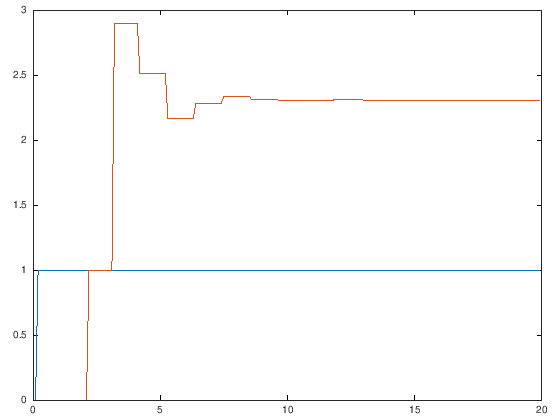

In [6]:
addpath("../Octsim");
tini = 0 # Start time
tfinal = 20 # End time
dt = 0.1 # Time Step
nflows = 2 #Number of data flows in the schematic, Zahlenwert entspricht nicht dem in Matlab (hier um 1 größer)
Ts = 1 # Sampling time for discrete time

c1{1} = StepSource(1,0,1,0.1); #StepSource(self,out,startv,endv,ts)
c1{2} = DTTransferFunction(1,2,num,den,Ts); #DTTransferFunction(self,inp,out,num,den,Ts)

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1 2]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));
ylim([-2, 4]);